<a href="https://colab.research.google.com/github/oamerl/machine-learning-projects/blob/main/Machine-Learning/wish.com-product-rating-classification/Wish_com_Product_Rating_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Data Importing 📋**


Importing needed libraries


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

Importing the data

In [ ]:
train_data = pd.read_csv("/content/train_new.csv") # reading the training dataset file
test_data = pd.read_csv("/content/test_new.csv") # reading the testing dataset file

In [ ]:
# printing the first 6 rows of the training set
train_data.head(6)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
5,14.00,51,EUR,100,0,4.0,36,0,0,0,...,pashesa,"(16,885 notes)",16885,3.897898,58a6f41a96f1bb57840b0ed4,0,NaN,summer,2020-08,633


In [ ]:
# printing different info about the trainig set like the data types of features and if there are any null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

Text(0, 0.5, 'rating Count')

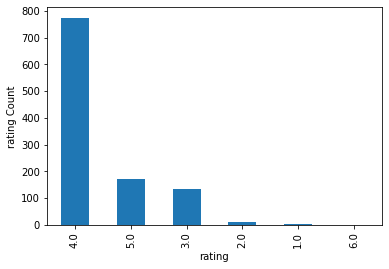

In [ ]:
# plotting the histogram of the target label which is the "rating"
plt = train_data.rating.value_counts().plot(kind = 'bar') # getting the count of different "rating" values
plt.set_xlabel('rating') # renaming the x-axis
plt.set_ylabel('rating Count') # renaming the y-axis

plotting pairwise correlation between features

<Axes: >

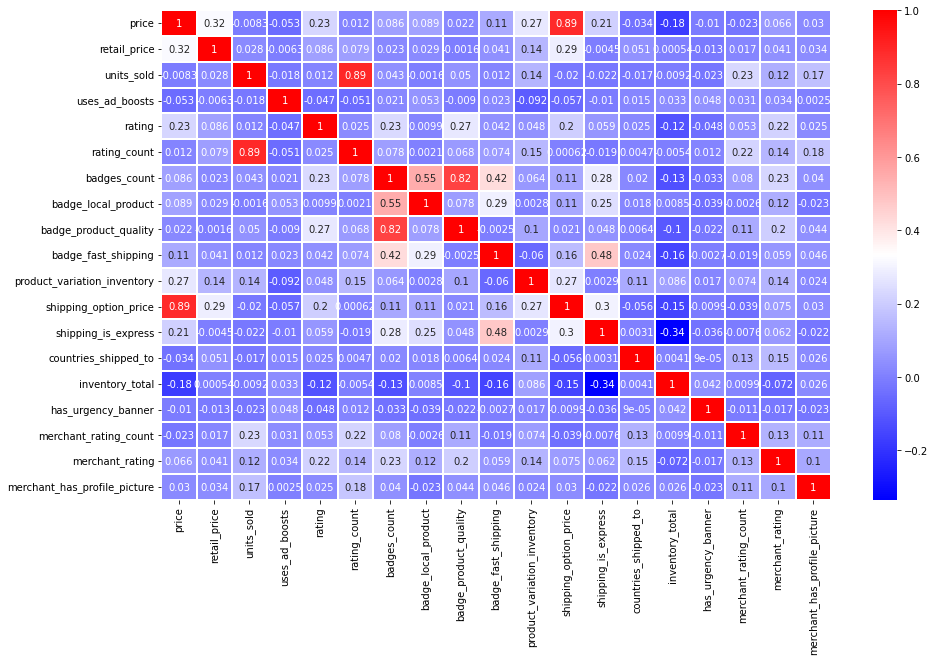

In [ ]:
#importing needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,9)) # changing the figure size such that correlation number can be easily seen
sns.heatmap(data = train_data.corr(),cmap='bwr', annot=True, linewidths=0.2) # using pandas library correlation function

Correlation analysis can be used to identify important relationships between features
in a dataset. Correlation analysis is often performed using a correlation coefficient, such as Pearson’s correlation coefficient or Spearman’s rank correlation coefficient. The correlation coefficient is a number between -1 and 1, where a correlation of 1 indicates a perfect positive linear relationship, a correlation of -1 indicates a perfect negative linear relationship, and a correlation of 0 indicates no linear relationship.


The above correlation calculated by pandas is Pearson’s correlation coefficient which is the default, however depending on the type of features that we want to check their correlation we should use the appropriate method. Below we mention some of them.

for Numerical - Numerical features correlation we can use:

* **Pearson’s correlation coefficient**: This is the most common correlation coefficient, and it measures the linear relationship between two numerical variables. It takes values between -1 and 1, where a value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation. It assumes features are normally distributed and
have linear relationship.

* **Spearman’s rank correlation coefficient**: It is similar to Pearson’s correlation coefficient, but it is more robust to outliers and non-linear relationships.
It also has a value between -1 and 1. It assumes features are not normally
distributed and relationship is not linear but monotonic. It can be used also in
case of Ordinal-Ordinal correlation or Oridnal-Numerical correlation.

* **Kendall’s tau correlation coefficient**: It measures the concordance between
two rankings of the same data. It has a value between -1 and 1, where a value of
1 indicates perfect concordance and a value of -1 indicates perfect discordance.
It assumes non-normality in data and is preferred to be used with Ordinal-Ordinal or Ordinal-Numerical but if ordinal variable has small number of
levels.

for Categorical - Categorical features correlation we can use:


* **Cramer’s v**: It measures the association between two categorical variables. It
has a value between 0 and 1, where a value of 0 indicates no association and a
value of 1 indicates perfect association.

* **Goodman-Kruskal’s lambda**: It is a measure of association, the possible values of lambda range from 0 to 1, with 0 indicating no association and 1 indicating perfect association. It is robust to outliers and is also a good measure of
association to use when the variables are not normally distributed. It is usually
used if there is no one dominant class of X for all levels of y.

Conserving the "id" of the transaction as the dataframe index such that we can use it later when we output the submission file that is be submitted on kaggle

In [ ]:
train_data.set_index('id', inplace = True) # setting the index of the training set dataframe to be the coulmn named "id" such that we don't lose it.
test_data.set_index('id', inplace = True) # setting the index of the testing set dataframe to be the coulmn named "id" such that we don't lose it.

# **2- Data Cleaning and Pre-processing 🛁🧼**

## *2.1) Non-important features drop*

In [ ]:
# defining the unneeded features columns to be dropped
features_to_drop = ["currency_buyer", "product_variation_size_id", "urgency_text", "merchant_title",
                    "merchant_name","merchant_info_subtitle", "merchant_profile_picture", "theme", "crawl_month"]

train_data = train_data.drop(features_to_drop, axis=1) # removing the unneeded features from the training set
X_test = test_data.drop(features_to_drop, axis=1) # removing the unneeded features from the testing set


In [ ]:
# printing different info about the trainig set after features dropping
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 272 to 1536
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   object 
 11  product_color                 1065 non-null   object 
 12  product_variation_inventory   1094 non-null   int64  
 13  s

In [ ]:
# printing different info about the testing set after features dropping
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 937 to 196
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   tags                          479 non-null    object 
 10  product_color                 467 non-null    object 
 11  product_variation_inventory   479 non-null    int64  
 12  shipping_option_name          479 non-null    object 
 13  shi

## *2.2) Missing values imputation*
*   "product_color" N/As are filled by the most repeated value
*   "origin_country" N/As are filled by the most repeated value
*   "has_urgency_banner"*italicized text* N/As are filled by zero






In [ ]:
print(train_data["product_color"].value_counts()) # printing the values count of the product colour
print("\n most repeated product colour is:",train_data["product_color"].mode()[0]) # getting the most repeated colour

black             219
white             173
blue               77
yellow             69
pink               68
                 ... 
claret              1
brown & yellow      1
whitestripe         1
Pink                1
light green         1
Name: product_color, Length: 87, dtype: int64

 most repeated product colour is: black


In [ ]:
print(train_data["origin_country"].value_counts()) # printing the values count of the origin country
print("\n most repeated origin country is:",train_data["origin_country"].mode()[0]) # getting the most repeated origin country

CN    1054
US      22
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

 most repeated origin country is: CN


In [ ]:
#print(train_data["origin_country"].value_counts().idxmax())
#train_data["origin_country"].mode()[0]

In [ ]:
#setting a dictionary of the coulmns containg nulls and the values to be added instead of the null
values_to_fill_NA = {"product_color": train_data["product_color"].value_counts().idxmax(), # product colour nulls are replaced by most repeated colour
                     "origin_country": train_data["origin_country"].mode()[0], # origin country nulls are replaced by most repeated country
                     "has_urgency_banner": 0} # nulls are replaced by zero

train_data.fillna(value=values_to_fill_NA, inplace=True) # filling the null values in the training data by the predefined values
X_test.fillna(value=values_to_fill_NA, inplace=True) # filling the null values in the testing data by the predefined values

In [ ]:
# printing different info about the trainig set after filling the null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 272 to 1536
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  tags                          1094 non-null   object 
 11  product_color                 1094 non-null   object 
 12  product_variation_inventory   1094 non-null   int64  
 13  s

In [ ]:
# printing different info about the testing set after filling the null values
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 937 to 196
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   units_sold                    479 non-null    int64  
 3   uses_ad_boosts                479 non-null    int64  
 4   rating_count                  479 non-null    int64  
 5   badges_count                  479 non-null    int64  
 6   badge_local_product           479 non-null    int64  
 7   badge_product_quality         479 non-null    int64  
 8   badge_fast_shipping           479 non-null    int64  
 9   tags                          479 non-null    object 
 10  product_color                 479 non-null    object 
 11  product_variation_inventory   479 non-null    int64  
 12  shipping_option_name          479 non-null    object 
 13  shi

## *2.3) Encoding categorical features using Binary Encoding*

Checking how many unique values are exsiting for the categorical features to choose the suitable encoding method whether one hot encoding or binary encoder


In [ ]:
print("there are", train_data['tags'].nunique(), "unique tags")
print("there are", train_data['product_color'].nunique(), "unique product_color")
print("there are", train_data['shipping_option_name'].nunique(), "shipping_option_name")
print("there are", train_data['origin_country'].nunique(), "origin_country")
print("there are", train_data['merchant_id'].nunique(), "merchant_id")


there are 895 unique tags
there are 87 unique product_color
there are 13 shipping_option_name
there are 5 origin_country
there are 747 merchant_id


Since there are a lot of unique values one hot encoding will be giving a lot of features and the data will be sparse so instead we will use binary encoding

In [ ]:
!pip install category_encoders # installing the library containg the BinaryEncoder
from category_encoders import BinaryEncoder # importing the BinaryEncoder Library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
features_to_encode = ['tags', 'product_color', 'shipping_option_name', 'origin_country', 'merchant_id'] # categorical features to encode

binary_encoder= BinaryEncoder(cols= features_to_encode) # binary encoder instance
encoded_train_features = binary_encoder.fit_transform(train_data[features_to_encode]) # the encoded training set categorical features df
encoded_test_features = binary_encoder.transform(X_test[features_to_encode]) # the encoded testing set categorical features df

# concatenating the original training set (without the features to be encoded) and the encoded features
train_data_new = pd.concat([train_data.drop(features_to_encode, axis=1), encoded_train_features], axis = 1)

# concatenating the original testing set (without the features to be encoded) and the encoded features
X_test_new = pd.concat([X_test.drop(features_to_encode, axis=1), encoded_test_features], axis = 1)


Other option is to drop these categorical featrues

In [ ]:
# features_to_drop = ["tags", "product_color", "shipping_option_name", "merchant_id"]

# train_data_new = train_data.drop(features_to_drop, axis=1)
# X_test_new = test_data.drop(features_to_drop, axis=1)

# features_to_encode = ['origin_country']
# binary_encoder= BinaryEncoder(cols= features_to_encode)

# encoded_train_features = binary_encoder.fit_transform(train_data[features_to_encode])
# encoded_test_features = binary_encoder.transform(X_test[features_to_encode])

# train_data_new = pd.concat([train_data_new.drop(features_to_encode, axis=1), encoded_train_features], axis = 1)
# X_test_new = pd.concat([X_test_new.drop(features_to_encode, axis=1), encoded_test_features], axis = 1)


In [ ]:
# printing different info about the trainig set after categorical features encoding
train_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 272 to 1536
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_local_product           1094 non-null   int64  
 8   badge_product_quality         1094 non-null   int64  
 9   badge_fast_shipping           1094 non-null   int64  
 10  product_variation_inventory   1094 non-null   int64  
 11  shipping_option_price         1094 non-null   int64  
 12  shipping_is_express           1094 non-null   int64  
 13  c

## *2.4) Numeric Features normalization/scaling using MinMaxScaler*


In [ ]:
train_data_new.describe() # checking different statistics of the data before scaling

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_id_0,merchant_id_1,merchant_id_2,merchant_id_3,merchant_id_4,merchant_id_5,merchant_id_6,merchant_id_7,merchant_id_8,merchant_id_9
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,...,0.244059,0.330896,0.458867,0.471664,0.479890,0.514625,0.494516,0.502742,0.490859,0.508227
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,...,0.429724,0.470751,0.498533,0.499425,0.499824,0.500015,0.500199,0.500221,0.500145,0.500161
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Numeric features scaling to be max of 1 and min of 0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler() # scaler instance to scale features to be max of 1 min of 0

# numeric features to be scaled
numeric_features = ["price", "retail_price", "units_sold", "rating_count","badges_count",
                    "product_variation_inventory", "shipping_option_price", "countries_shipped_to",
                    "inventory_total", "merchant_rating_count", "merchant_rating"]

train_data_new[numeric_features] = minmax.fit_transform(train_data_new[numeric_features]) # scaling the numeric features in the training set
X_test_new[numeric_features] = minmax.transform(X_test_new[numeric_features]) # scaling the numeric features in the testing set

In [ ]:
train_data_new.describe() # checking different statistics of the data after scaling

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_id_0,merchant_id_1,merchant_id_2,merchant_id_3,merchant_id_4,merchant_id_5,merchant_id_6,merchant_id_7,merchant_id_8,merchant_id_9
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,0.152516,0.086848,0.045177,0.432358,4.006399,0.044134,0.038087,0.019196,0.083181,0.011883,...,0.244059,0.330896,0.458867,0.471664,0.479890,0.514625,0.494516,0.502742,0.490859,0.508227
std,0.083905,0.127211,0.098257,0.495630,0.585706,0.098224,0.116154,0.137275,0.276282,0.108409,...,0.429724,0.470751,0.498533,0.499425,0.499824,0.500015,0.500199,0.500221,0.500145,0.500161
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100625,0.020000,0.000990,0.000000,4.000000,0.001157,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.145833,0.032000,0.009990,0.000000,4.000000,0.006918,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.208333,0.096000,0.049990,1.000000,4.000000,0.040759,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## *2.5) Target Label check*

Now before we split our training dataset into features matrix and labels (before decoupling the features from label) we will check if there is any inconsistency in the target label which is the "rating"

In [ ]:
print(train_data_new["rating"].value_counts()) # checking the values count of the target label

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64


we found a rating value of "6" which is inconsistent with the classes to will drop the record of this rating

In [ ]:
# Dropping the row that contains the rating equal to six as this is inconsisitent with the label categs
invalid_rating_index = train_data_new[train_data_new["rating"] == 6.0].index[0] # getting the index at which the rating=6
train_data_new = train_data_new.drop(index=invalid_rating_index) # dropping the index at which the rating=6

# another way for dropping using list comprehension
#train_data_new = train_data_new.drop(index=[row for row in train_data_new.index if 6.0 == train_data_new.loc[row, 'rating']])


In [ ]:
print(train_data_new["rating"].value_counts()) # checking the values count of the target label after dropping the inconsistent label

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
Name: rating, dtype: int64


# **3- Division of training set into training and validation and decoupling the features from the labels ✂️**

Decoupling the training dataset's features matrix and labels vetcor

In [ ]:
y_train = train_data_new["rating"] # target label series
X_train = train_data_new.drop(['rating'], axis=1) # training features df


In [ ]:
X_train.shape # training feature shape

(1093, 52)

In [ ]:
y_train.shape # training label shape

(1093,)

Dividing the Training data into training and validation sets

In [ ]:
# splitting the dataset into 80% training and 20% testing while using stratify to ensure equal class distribution in training and validation sets
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state=10)

print("Training data shape:",X_tr.shape) # printing training data number of rows and coulmns
print("Testing data shape",X_valid.shape) # printing validation data number of rows and coulmns
print("Training labels shape",y_tr.shape) # printing training target label number of rows
print("Testing labels shape",y_valid.shape) # printing validation target label number of rows

Training data shape: (874, 52)
Testing data shape (219, 52)
Training labels shape (874,)
Testing labels shape (219,)


# **4- Imbalanced data issue treatement ⏳**

In [ ]:
# getting unique target values count
y_tr.value_counts()

4.0    619
5.0    136
3.0    108
2.0      9
1.0      2
Name: rating, dtype: int64

Text(0, 0.5, 'rating Count')

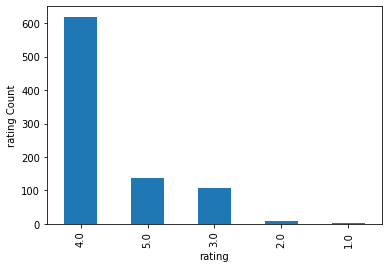

In [ ]:
# plotting the unique target values count
plt = y_tr.value_counts().plot(kind = 'bar')
plt.set_xlabel('rating') # setting x-axis name
plt.set_ylabel('rating Count') # setting y-axis name

From the above chart it is evident that the data is imablanced so we need to treat this data imbalance issue as it affects the model behaviour specially for the under-represented classes which happen to be low ratings which we care for,as we need to know and detect if our product will end up have a poor rating such that we can improve it and increase the probability of having a good rating

## *4.1) Tomek Links (for undersampling the majority class)*

In [ ]:
from imblearn.under_sampling import TomekLinks # importing the library
tl = TomekLinks(sampling_strategy='majority') # making an instance of the imputer

# removing the tomek links from the data set (they are the majority class instances on the boundry of the class with other classes for easier classification)
X_tr, y_tr = tl.fit_resample(X_tr, y_tr)

In [ ]:
# checking training data shape after tomek links removal (undersampling)
print("Training data shape:",X_tr.shape)
print("Training labels shape",y_tr.shape)


Training data shape: (821, 52)
Training labels shape (821,)


In [ ]:
y_tr.value_counts() # checking the target label values after tomek links removal

4.0    566
5.0    136
3.0    108
2.0      9
1.0      2
Name: rating, dtype: int64

## *4.2) SMOTE (for oversampling the minority classes)*

Duplicating the minority class manually for easier usage of SMOTE since the usage of SMOTE requires a k neigbours parameter which must be less than the minimum number of each class instances. the class of rating = 1 happens to occur just one time so k must be less than one which doesn't make sense so we need to duplicate the records of the minority class before using SMOTE to avoid this issue

In [ ]:
# we re-couple the features and the labels back for easier minority classes records duplication
train_data_new = pd.concat([X_tr, y_tr], axis = 1)

# repeated records of the rating == 1 (minority)
df_repeated_rating_1 = pd.concat([train_data_new[train_data_new["rating"] == 1]]*10, ignore_index=True)

# repeated records of the rating == 2
df_repeated_rating_2 = pd.concat([train_data_new[train_data_new["rating"] == 2]]*2, ignore_index=True)

In [ ]:
# adding the obtained repeated records to the training data to be used by smote passing the k neigbors issue
train_data_new =  pd.concat([train_data_new, df_repeated_rating_1, df_repeated_rating_2], ignore_index=True)

In [ ]:
train_data_new.rating.value_counts() # checking the counts and now the minority classes number of instances increased so we can use a suitabe k

4.0    566
5.0    136
3.0    108
2.0     27
1.0     22
Name: rating, dtype: int64

In [ ]:
# decoupling the features and label again
y_tr = train_data_new["rating"]
X_tr = train_data_new.drop(['rating'], axis=1)

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE # importing the library
smote = SMOTE(sampling_strategy='not majority', k_neighbors = 3) # SMOTE instance that will be oversampling all classes that are not the majority
X_tr, y_tr = smote.fit_resample(X_tr, y_tr) # performing the oversampling

In [ ]:
y_tr.value_counts() # checking the target label count after oversampling

3.0    566
4.0    566
5.0    566
2.0    566
1.0    566
Name: rating, dtype: int64

Text(0, 0.5, 'rating Count')

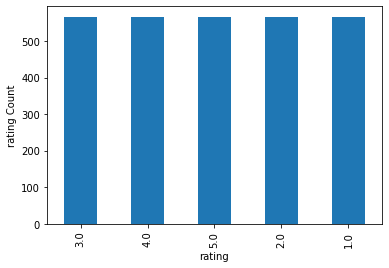

In [ ]:
# visualizing the target label count after the oversampling
plt = y_tr.value_counts().plot(kind = 'bar') # getting the training target label values counts
plt.set_xlabel('rating') # setting x-axis name
plt.set_ylabel('rating Count') # setting y-axis name

In [ ]:
# checking training data shape after SMOTE oversampling
print("Training data shape:",X_tr.shape)
print("Training labels shape",y_tr.shape)

Training data shape: (2830, 52)
Training labels shape (2830,)


# **5- Tried Models 📈**

## Classification Metrics Function

we here define a function that will be used for each model assesment that will be returing different metrics such as accuracy, mean F1 score, mean precision and mean recall. the mean calcualted is the macro version which is the unweighted mean of each class metric

In [ ]:
def print_model_metrics(y_test, y_pred):
    ''' - Two parameters are given, the true label (y_test) and predicted labels (y_pred)
    - Four metircs are returned in the following order: Accuracy, Recall, Precision and F1 score.
    - The function also prints these metrics'''

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average = "macro")
    prec = precision_score(y_test, y_pred, average = "macro")
    f1 = f1_score(y_test, y_pred, average = "macro")

    print("Model accuracy is: {0:.2f}".format(acc))
    print("Model recall is: {0:.2f}".format(recall))
    print("Model precision is: {0:.2f}".format(prec))
    print("Model F1 score is: {0:.2f}".format(f1))

    return acc, recall, prec, f1

## *Model 1 & 2: Decision Tree with Grid Search*

We will begin our models trials with decision trees as they are usually good classifiers but we should be careful of overfitting 🙄.

DT Model 1

Training

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree_clf = tree.DecisionTreeClassifier(class_weight = "balanced", random_state=1) # decision tree model instance to be used by grid search

# grid serach hyperparameters search space
params = {"criterion": ("gini", "entropy"),
          "splitter": ("best", "random"),
          "min_samples_split": ( 2, 5, 8, 12, 15, 18, 21 ,24, 27),
          "min_samples_leaf":( 2, 5, 8, 12, 15, 18, 21 ,24, 27),
          "max_features": ("sqrt", "log2", None)}

tree_clf_grid = GridSearchCV(estimator=tree_clf, param_grid=params, scoring="f1_macro", cv=5) # grid search instance

tree_clf_grid.fit(X_tr, y_tr) # fitting the model with the optimum hyperparameters

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 'log2', None),
                         'min_samples_leaf': (2, 5, 8, 12, 15, 18, 21, 24, 27),
                         'min_samples_split': (2, 5, 8, 12, 15, 18, 21, 24, 27),
                         'splitter': ('best', 'random')},
             scoring='f1_macro')

In [ ]:
# Printing best hyperparameters found that corresponds to the best model
tree_clf_grid.best_params_


{'criterion': 'gini',
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" which is macro f1 score
tree_clf_grid.best_score_

0.8633564508811679

Prediction

In [ ]:
# Prediction
y_pred_tree = tree_clf_grid.predict(X_valid) # predicted output
print(classification_report(y_valid, y_pred_tree))

              precision    recall  f1-score   support

         1.0       0.50      1.00      0.67         1
         2.0       0.67      1.00      0.80         4
         3.0       0.23      0.33      0.27        40
         4.0       0.83      0.73      0.78       232
         5.0       0.51      0.61      0.55        51

    accuracy                           0.66       328
   macro avg       0.55      0.73      0.61       328
weighted avg       0.71      0.66      0.68       328



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics"
tree_acc, tree_recall, tree_prec, tree_f1 = print_model_metrics(y_valid, y_pred_tree)

Model accuracy is: 0.66
Model recall is: 0.73
Model precision is: 0.55
Model F1 score is: 0.61


Since the mean cross-validated f1 score (86%) is higher than the testing score done using the separate validation set (61%) therefore the model is overfitting 🤕 as an expected behaviour of decision trees so will try another model of the decision trees with different set of hyperparameters for controlling the overfitting mainly we will introduce the max depth parameter and try higher values of the minimum samples required for splitting and the minimum samples required to be in a node in attempt to prune the tree 🌳

DT Model 2

Training

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree_clf = tree.DecisionTreeClassifier(class_weight = "balanced", random_state=2) # decision tree model instance to be used by grid search

# grid serach hyperparameters search space
params = {"criterion": ["gini"],
          "splitter": ["best"],
          "min_samples_split": [20, 30, 50],
          "min_samples_leaf":[10, 20, 30],
          "max_features": ["log2", None],
          'max_depth': [10, 20]
          }

tree_clf_grid = GridSearchCV(estimator=tree_clf, param_grid=params, scoring="f1_macro", cv=5) # grid search instance

tree_clf_grid.fit(X_tr, y_tr) # fitting the model with the optimum hyperparameters

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=2),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20],
                         'max_features': ['log2', None],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [20, 30, 50],
                         'splitter': ['best']},
             scoring='f1_macro')

In [ ]:
# Printing best hyperparameters found that corresponds to the best model
tree_clf_grid.best_params_


{'criterion': 'gini',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'splitter': 'best'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" which is macro f1 score
tree_clf_grid.best_score_

0.8289208148191187

Prediction

In [ ]:
# Prediction
y_pred_tree = tree_clf_grid.predict(X_valid) # predicted output
print(classification_report(y_valid, y_pred_tree))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.50      0.67      0.57         3
         3.0       0.21      0.19      0.20        27
         4.0       0.79      0.79      0.79       155
         5.0       0.43      0.44      0.43        34

    accuracy                           0.66       219
   macro avg       0.38      0.42      0.40       219
weighted avg       0.66      0.66      0.66       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics"
tree_acc, tree_recall, tree_prec, tree_f1 = print_model_metrics(y_valid, y_pred_tree)

Model accuracy is: 0.66
Model recall is: 0.42
Model precision is: 0.38
Model F1 score is: 0.40


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Unfortunately the model is still overfitting as the mean cross-validated f1 score is 0.82 and the testing score is 0.4 😥. So now we will shift towards other models as maybe the DT is not suitable for this dataset/problem.

## *Model 3: Naive Bayes*

Training

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB() # model instance
NB.fit(X_tr, y_tr) # model training


GaussianNB()

In [ ]:
# training set prediction (training set error)
# Printing the model metrics using the previously defined function "print_model_metrics"

y_pred_NB_tr = NB.predict(X_tr) # predicted output
NB_acc_tr, NB_recall_tr, NB_prec_tr, NB_f1_tr = print_model_metrics(y_tr, y_pred_NB_tr)

Model accuracy is: 0.61
Model recall is: 0.61
Model precision is: 0.69
Model F1 score is: 0.57


Prediction

In [ ]:
# validation set prediction (validation set error)
y_pred_NB = NB.predict(X_valid) # predicted output
NB_acc, NB_recall, NB_prec, NB_f1 = print_model_metrics(y_valid, y_pred_NB)

Model accuracy is: 0.27
Model recall is: 0.43
Model precision is: 0.32
Model F1 score is: 0.23


In [ ]:
print(classification_report(y_valid, y_pred_NB)) # classification report for the validatin set results

              precision    recall  f1-score   support

         2.0       0.05      0.67      0.10         3
         3.0       0.15      0.63      0.24        27
         4.0       0.72      0.22      0.34       155
         5.0       0.37      0.21      0.26        34

    accuracy                           0.27       219
   macro avg       0.32      0.43      0.23       219
weighted avg       0.59      0.27      0.31       219



Its clear that Naive Bayes is underfitting as both the training score and validation score are both very low 😕, this maybe due to the assumption the Naive Bayes model makes, that the features are independant, isn't suitable for this dataset. As we have seen in the pair-wise correlation matrix there were some correlated features. Since there are no hyperparameters for this model class to be tried we will now try another model architecture which is the SVM.

## *Model 4: One Versus Rest*

We will first try this manual OvR classifier using SVC

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

ovr = OneVsRestClassifier(SVC(class_weight = "balanced", C = 10))
ovr.fit(X_tr, y_tr)

# Prediction
y_pred_ovr = ovr.predict(X_valid)

print(classification_report(y_valid, y_pred_ovr))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.67      0.50      0.57         4
         3.0       0.33      0.35      0.34        40
         4.0       0.78      0.78      0.78       232
         5.0       0.39      0.37      0.38        51

    accuracy                           0.66       328
   macro avg       0.63      0.60      0.61       328
weighted avg       0.67      0.66      0.67       328



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
ovr_acc, ovr_recall, ovr_prec, ovr_f1 = print_model_metrics(y_valid, y_pred_ovr)

Model accuracy is: 0.66
Model recall is: 0.60
Model precision is: 0.63
Model F1 score is: 0.61


Astonishingly this is the best model performance so far where it acheived 0.76 on the public leaderboard in kaggle without hyperparameters tuning 😅 so we will experiment more with SVC as they seem promising 🧐

## *Model 5 & 6: SVC with Grid Search*

1st SVC Model

Training

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC() # model instance to be used by grid search

# hyperparameters seacrh space
params = {"kernel": ("linear", "rbf", "poly"),
          "gamma": ("scale", "auto"),
          "C": [8,9],
          "degree": [2,3]}

# svm grid search instance
svm_grid = GridSearchCV(estimator=svm_model,
                        param_grid=params,
                        scoring="f1_macro",
                        cv=5)

svm_grid.fit(X_tr, y_tr) # model training with optimal hyperparameters found

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [8, 9], 'degree': [2, 3],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='f1_macro')

In [ ]:
# Printing best hyperparameters found that corresponds to the best model
svm_grid.best_params_

{'C': 8, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" which is the f1 macro score
svm_grid.best_score_

0.9217977845471566

Prediction

In [ ]:
# Prediction
y_pred_svm = svm_grid.predict(X_valid)
print(classification_report(y_valid, y_pred_svm))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.67      0.50      0.57         4
         3.0       0.27      0.30      0.29        40
         4.0       0.78      0.80      0.79       232
         5.0       0.40      0.33      0.36        51

    accuracy                           0.66       328
   macro avg       0.62      0.59      0.60       328
weighted avg       0.66      0.66      0.66       328



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
svm_acc, svm_recall, svm_prec, svm_f1 = print_model_metrics(y_valid, y_pred_svm)

Model accuracy is: 0.66
Model recall is: 0.59
Model precision is: 0.62
Model F1 score is: 0.60


The SVC model here seems to be overfitting to the training data as the mean cross-validation f1 score is 92% while the mean testing f1 score is 60% 😣 so will try another set of hyperparameters ranges in aim of reducing this overfitting, mainly we will try to decrease the hyperparameter C as it is inversely proportional to the regularization.

2nd SVC Model

Training

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC() # model instance to be used by grid search

# hyperparameters seacrh space
params = {"kernel": ("linear", "rbf", "poly"),
          "gamma": ("scale", "auto"),
          "C": [0.05, 0.1, 0.5, 1],
          "degree": [2,3]}

# svm grid search instance
svm_grid = GridSearchCV(estimator=svm_model,
                        param_grid=params,
                        scoring="f1_macro",
                        cv=5)

svm_grid.fit(X_tr, y_tr) # model training with optimal hyperparameters found

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.5, 1], 'degree': [2, 3],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='f1_macro')

In [ ]:
# Printing best hyperparameters found that corresponds to the best model
svm_grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
# Prining the best hyperparameter model score on the chosen "scoring metric" which is the f1 macro score
svm_grid.best_score_

0.9112692757987763

Prediction

In [ ]:
# Prediction
y_pred_svm = svm_grid.predict(X_valid)
print(classification_report(y_valid, y_pred_svm))

              precision    recall  f1-score   support

         2.0       0.33      0.33      0.33         3
         3.0       0.20      0.22      0.21        27
         4.0       0.78      0.80      0.79       155
         5.0       0.38      0.29      0.33        34

    accuracy                           0.64       219
   macro avg       0.42      0.41      0.42       219
weighted avg       0.64      0.64      0.64       219



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
svm_acc, svm_recall, svm_prec, svm_f1 = print_model_metrics(y_valid, y_pred_svm)

Model accuracy is: 0.64
Model recall is: 0.41
Model precision is: 0.42
Model F1 score is: 0.42


Now even with very small values of C (high regularization) the SVC model is still overfitting 90% vs 42% 😩. At this point I really believe that maybe there is an issue with the data as the models can't generalize to any unseen data, so maybe the undersampling with the tomek links has removed important records or maybe the oversampling is not representative of the real life testing dataset and there is miss match between the training and the testing sets. We will carry on experimenting with other algorithms with the same data processing used and if the case of overfitting still remains then we will try to use different data preprocessing for training hoping for better generalizability ❗️

Next we will try more advanced algorithms to tackle this stubborn dataset 👊

## *Model 7: Gradient Boosting Classifier with Grid Search*

Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state =100) # model instance to be used by grid search

# hyperparameters search space
gbc_params = [{'loss': ['log_loss'],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 250, 500],
              'subsample': [0.8],
              'max_depth': [3, 5, 7, 10]
              }]

# grid search instance to be fitted
GBC_grid = GridSearchCV(estimator = GBC,
                        param_grid = gbc_params,
                        scoring = 'f1_macro',
                        cv = 5)

GBC_grid.fit(X_tr, y_tr) # model training with optimal hyperparameters found


In [ ]:
best_parameters_GBC = GBC_grid.best_params_  # best hyperparameters found that corresponds to the best model
best_f1_macro_GBC = GBC_grid.best_score_ # best model score (fitted by optimal hyperparameters)
print("Best f1 score macro: {:.2f} %".format(best_f1_macro_GBC*100))
print("Best Parameters:", best_parameters_GBC)

Best Accuracy: 93.70 %
Best Parameters: {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'n_estimators': 250, 'subsample': 0.8}


Prediction

In [ ]:
# Prediction
y_pred_GBC = GBC_grid.predict(X_valid) # predicted output
print(classification_report(y_valid, y_pred_GBC))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      0.50      0.67         4
         3.0       0.45      0.35      0.39        40
         4.0       0.83      0.88      0.85       232
         5.0       0.58      0.55      0.57        51

    accuracy                           0.76       328
   macro avg       0.77      0.65      0.70       328
weighted avg       0.74      0.76      0.75       328



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
GBC_acc, GBC_recall, GBC_prec, GBC_f1 = print_model_metrics(y_valid, y_pred_GBC)

Model accuracy is: 0.76
Model recall is: 0.65
Model precision is: 0.77
Model F1 score is: 0.70


This model has excellent performance on the mean cross-validation f1 score being 93.7% but on the testing set it gives 70% and on kaggle public leaderboard it is just 73.64% so it is overfitting to the training data which supports may belief that there is an issue with the data but will keep this for the end. We will try another two algorithms and see if they can generalize.

## *Model 8: XGBoost*

for XG boosting we need to change the target labels to be integer starting from zero so we will define a function to subtract 1 from the labels and convert it to integer and we will reverse these operations on the predicted lables at the end

model-specific preprocessing

In [ ]:
# function to change the target label to int and subtract 1
def change_to_cat(label):
    label = label - 1
    label  = int(label)
    return label


In [ ]:
y_tr = y_tr.apply(change_to_cat) # applying the function to the training labels vector


In [ ]:
y_tr.value_counts() # checking if the target labels have changed

2    566
3    566
4    566
1    566
0    566
Name: rating, dtype: int64

Training

In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier() # model instnace
XGB.fit(X_tr, y_tr) # model training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Prediction

In [ ]:
# Prediction
y_pred_XGB = XGB.predict(X_valid) # validation dataset prediction

#reversing the operations done before on the training label by adding 1 and converting to float
y_pred_XGB = y_pred_XGB + 1
y_pred_XGB = y_pred_XGB.astype(float)

# Printing the model metrics using the previously defined function "print_model_metrics"
print(classification_report(y_valid, y_pred_XGB))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        26
         2.0       0.88      1.00      0.94        15
         3.0       0.38      0.25      0.30        20
         4.0       0.78      0.89      0.83       100
         5.0       0.69      0.44      0.54        25

    accuracy                           0.78       186
   macro avg       0.75      0.72      0.72       186
weighted avg       0.76      0.78      0.77       186



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics" at section 4 for testing data.
XGB_acc, XGB_recall, XGB_prec, XGB_f1 = print_model_metrics(y_valid, y_pred_XGB)

Model accuracy is: 0.78
Model recall is: 0.72
Model precision is: 0.75
Model F1 score is: 0.72


This model is having a relatively high mean f1 score on the validation 72% compared with other tried models but it is very low on kaggle where it achieves 62.7% mean f1 score so it is either overfitting or underfitting, I cant really tell for this model as I didn't calculate the training metrics so we will try grid search to find the optimal hyperparameters as here we just used the default configuration just in aim to see if there is any hope in further investigating this model class 🥺 and the metrics are not that bad for a rough estimates so it is worth tuning.

## *Model 9: XGBoost with Grid Search*

Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

XGB = XGBClassifier() # model instance to be used by grid search

# hyperparameters search space
XGB_params = [{
               'learning_rate': [0.1, 0.01],
               'gamma': [0, 0.25, 1],
               'reg_lambda': [0, 1, 10],
               'n_estimators': [100, 250, 500],
               'subsample': [0.6],
               'colsample_bytree': [0.5],
               'max_depth': [5, 7, 10]
              }]

# grid search instance to be fitted
XGB_grid = GridSearchCV(estimator = XGB,
                        param_grid = XGB_params,
                        scoring = 'f1_macro',
                        cv = 5)

XGB_grid.fit(X_tr, y_tr) # model training


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                          'learning_rate': [0.1, 0.01], 'max_depth': [5, 7, 10],
                          'n_estimators': [100, 250, 500],
                          'reg_lambda': [0, 1, 10], 'subsample': [0.6]}],
             scoring='f1_macro')

In [ ]:
best_parameters_XGB = XGB_grid.best_params_ # best hyperparameters found that corresponds to the best model
best_f1_macro_XGB = XGB_grid.best_score_ # best model score (fitted by optimal hyperparameters)
print("Best f1 score macro: {:.2f} %".format(best_f1_macro_XGB*100))
print("Best Parameters:", best_parameters_XGB)

Best f1 score macro: 98.71 %
Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'reg_lambda': 1, 'subsample': 0.6}


Prediction

In [ ]:
# Prediction
y_pred_XGB_grid = XGB_grid.predict(X_valid) # predicted output

#reversing the operations done before on the training label by adding 1 and converting to float
y_pred_XGB_grid = y_pred_XGB_grid + 1
y_pred_XGB_grid = y_pred_XGB_grid.astype(float)
print(classification_report(y_valid, y_pred_XGB_grid))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        26
         2.0       0.88      1.00      0.94        15
         3.0       0.44      0.35      0.39        20
         4.0       0.78      0.88      0.83       100
         5.0       0.64      0.36      0.46        25

    accuracy                           0.78       186
   macro avg       0.75      0.72      0.72       186
weighted avg       0.76      0.78      0.76       186



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics"
XGB_gr_acc, XGB_gr_recall, XGB_gr_prec, XGB_gr_f1 = print_model_metrics(y_valid, y_pred_XGB_grid)

Model accuracy is: 0.78
Model recall is: 0.72
Model precision is: 0.75
Model F1 score is: 0.72


Now this model is having superior performance on the training set which is not matched by any other tried model where the mean cross-validated f1 score is 98.71% 😮 but unfortuantely as usual the model is overfitting as the mean f1 score on the testing is 72% and kaggle score is also 72.38%.
so this model is actually worth noting and it is really qualified for further testing with other data preprocessing that we will check but before that we will check a final simialr algorithm which is random forest.

## *Model 10: Random Forest with Grid Search*



Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight = "balanced_subsample") # model instance to be used by grid search

# hyperparameters search space
rf_params = {'n_estimators': [250, 500],
              'max_depth': [10, 15],
              "min_samples_split": [10, 30, 60],
              "min_samples_leaf": [10, 30, 60],
             }

# grid search instance to be fitted
rf_grid = GridSearchCV(estimator = rf,
                        param_grid = rf_params,
                        scoring = 'f1_macro',
                        cv = 5)

rf_grid.fit(X_tr, y_tr) # model training


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             param_grid={'max_depth': [10, 15],
                         'min_samples_leaf': [10, 30, 60],
                         'min_samples_split': [10, 30, 60],
                         'n_estimators': [250, 500]},
             scoring='f1_macro')

In [ ]:
best_parameters_rf = rf_grid.best_params_ # best hyperparameters found that corresponds to the best model
best_f1_macro_rf = rf_grid.best_score_ # best model score (fitted by optimal hyperparameters)
print("Best f1 score macro: {:.2f} %".format(best_f1_macro_rf*100))
print("Best Parameters:", best_parameters_rf)

Best f1 score macro: 54.33 %
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}


Prediction

In [ ]:
# prediction
y_pred_rf_grid = rf_grid.predict(X_valid) # predicted output
print(classification_report(y_valid, y_pred_rf_grid))

              precision    recall  f1-score   support

         2.0       0.50      0.67      0.57         3
         3.0       0.30      0.33      0.32        27
         4.0       0.85      0.77      0.81       155
         5.0       0.56      0.74      0.63        34

    accuracy                           0.71       219
   macro avg       0.55      0.63      0.58       219
weighted avg       0.73      0.71      0.72       219



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics"
rf_gr_acc, rf_gr_recall, rf_gr_prec, rf_gr_f1 = print_model_metrics(y_valid, y_pred_rf_grid)

It seems that the random forest is underfitting as the mean cross-validation f1 score is 54.33% and the mean f1 score on the separate validation set is 58%, we can try other hyperparameters ranges but we will not try that further as we need to check if actually the training data is representitive or not before wasting any more time, so we will take the best promising model which happened to be the XGboosting model and try it without the data imbalance treatment which may has skewed our dataset away from the real features distributions.

## *Model 11 & 12: XGBoost with Grid Search without SMOTE or Tomelinks* ⭐️⭐️⭐️

Now we are back with XG boost where we will try different preprocessing on the training data as it was the best performing model on the training data as we have seen before.
Now the only change that we made for the training data is that we didn't take class imbalance issue into consideration as maybe the oversampling for minority classes by SMOTE and undersampling for majority class by Tomeklinks didn't end up being representitve of the actual real testing set 🤔

1st XGBoosting model without SMOTE/Tomeklinks

Training

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

XGB = XGBClassifier() # model instance to be used by grid search

# hyperparameters search space
XGB_params = [{
               'learning_rate': [0.1, 0.01],
               'gamma': [0, 0.25, 1],
               'reg_lambda': [0, 1, 10],
               'n_estimators': [100, 250, 500],
               'subsample': [0.6],
               'colsample_bytree': [0.5],
               'max_depth': [5, 7, 10]
              }]

# grid search instance to be fitted
XGB_grid = GridSearchCV(estimator = XGB,
                        param_grid = XGB_params,
                        scoring = 'f1_macro',
                        cv = 5)

XGB_grid.fit(X_tr, y_tr) # model training


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                          'learning_rate': [0.1, 0.01], 'max_depth': [5, 7, 10],
                          'n_estimators': [100, 250, 500],
                          'reg_lambda': [0, 1, 10], 'subsample': [0.6]}],
             scoring='f1_macro')

In [ ]:
best_parameters_XGB = XGB_grid.best_params_ # best hyperparameters found that corresponds to the best model
best_f1_macro_XGB = XGB_grid.best_score_ # best model score (fitted by optimal hyperparameters)
print("Best f1 score macro: {:.2f} %".format(best_f1_macro_XGB*100))
print("Best Parameters:", best_parameters_XGB)

Best f1 score macro: 65.63 %
Best Parameters: {'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'reg_lambda': 0, 'subsample': 0.6}


Prediction

In [ ]:
# Prediction
y_pred_XGB_grid = XGB_grid.predict(X_valid) # predicted output

#reversing the operations done before on the training label by adding 1 and converting to float
y_pred_XGB_grid = y_pred_XGB_grid + 1
y_pred_XGB_grid = y_pred_XGB_grid.astype(float)
print(classification_report(y_valid, y_pred_XGB_grid))

              precision    recall  f1-score   support

         2.0       0.67      0.67      0.67         3
         3.0       0.43      0.22      0.29        27
         4.0       0.81      0.94      0.87       155
         5.0       0.74      0.50      0.60        34

    accuracy                           0.78       219
   macro avg       0.66      0.58      0.61       219
weighted avg       0.75      0.78      0.75       219



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics"
XGB_gr_acc, XGB_gr_recall, XGB_gr_prec, XGB_gr_f1 = print_model_metrics(y_valid, y_pred_XGB_grid)

Model accuracy is: 0.78
Model recall is: 0.58
Model precision is: 0.66
Model F1 score is: 0.61


As we can see now the model turned from overfitting to underfiiting as the mean cross-validation f1 score is 65.63% but also the perfromance on the separate validation set is 61%, they are consistent! this consistency has not been seen before except for the underfitting random forest, so we will try to overcome this underfitting by having more training examples for each tree in the XGboosting model controlled by 'subsample' hyperparameter and take more features per tree by trying other values of 'colsample_bytree'

2nd XGBoosting model without SMOTE/Tomeklinks

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

XGB = XGBClassifier() # model instance to be used by grid search

# hyperparameters search space
XGB_params = [{
               'learning_rate': [0.1],
               'gamma': [0, 0.25, 1],
               'reg_lambda': [0],
               'n_estimators': [250, 500],
               'subsample': [0.8],
               'colsample_bytree': [0.8],
               'max_depth': [5, 7, 10]
              }]

# grid search instance to be fitted
XGB_grid = GridSearchCV(estimator = XGB,
                        param_grid = XGB_params,
                        scoring = 'f1_macro',
                        cv = 5)

XGB_grid.fit(X_tr, y_tr) # model training


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'colsample_bytree': [0.8], 'gamma': [0, 0.25, 1],
                          'learning_rate': [0.1], 'max_depth': [5, 7, 10],
                          'n_estimators': [250, 500], 'reg_lambda': [0],
                          'subsample': [0.8]}],
             scoring='f1_macro')

In [ ]:
best_parameters_XGB = XGB_grid.best_params_ # best hyperparameters found that corresponds to the best model
best_f1_macro_XGB = XGB_grid.best_score_ # best model score (fitted by optimal hyperparameters)
print("Best f1 score macro: {:.2f} %".format(best_f1_macro_XGB*100))
print("Best Parameters:", best_parameters_XGB)

Best f1 score macro: 89.71 %
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500, 'reg_lambda': 0, 'subsample': 0.8}


In [ ]:
# Prediction
y_pred_XGB_grid = XGB_grid.predict(X_valid) # predicted output

#reversing the operations done before on the training label by adding 1 and converting to float
y_pred_XGB_grid = y_pred_XGB_grid + 1
y_pred_XGB_grid = y_pred_XGB_grid.astype(float)
print(classification_report(y_valid, y_pred_XGB_grid))

              precision    recall  f1-score   support

         2.0       0.67      0.67      0.67         3
         3.0       0.40      0.22      0.29        27
         4.0       0.82      0.94      0.88       155
         5.0       0.78      0.53      0.63        34

    accuracy                           0.79       219
   macro avg       0.67      0.59      0.62       219
weighted avg       0.76      0.79      0.76       219



In [ ]:
# Printing the model metrics using the previously defined function "print_model_metrics"
XGB_gr_acc, XGB_gr_recall, XGB_gr_prec, XGB_gr_f1 = print_model_metrics(y_valid, y_pred_XGB_grid)

Model accuracy is: 0.79
Model recall is: 0.59
Model precision is: 0.67
Model F1 score is: 0.62


Although at first glance this model seems to be overfitting but when tested vs the public leaderboard kaggle test set the actual performance is 79.916% mean f1 score, which is the highest obtained score and finally we made it up to the 2nd check point 🥳🥳 this can mean that our intuition about the representativeness of the training set after SMOTE/Tomeklinks vs the actual testing set turned out to be somewhat true 😊.

We can try to further tune this model as it has high potential for fitting the data correctly but we will end it up her and maybe try it later offline👋

# **6- Training on whole dataset and test set prediction 🎯**

Final training of the best model on whole dataset

In [ ]:
# fitting the model on the whole dataset

#X_train =  pd.concat([X_tr, X_valid], ignore_index=True)
#y_train =  pd.concat([y_tr, y_valid], ignore_index=True)
#XGB.fit(X_train, y_train)

Predictions to be submitted to Kaggle

In [ ]:
# Testing set Prediction
y_pred_XGB_test = XGB_grid.predict(X_test_new) # output prediction

#reversing the operations done before on the training label by adding 1 and converting to float
y_pred_XGB_test = y_pred_XGB_test + 1
y_pred_XGB_test = y_pred_XGB_test.astype(float)

In [ ]:
y_pred_XGB_test # checking the predicted values

array([5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 5., 4., 5., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 5., 4., 3., 4., 4., 3., 3., 3., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 5., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 5.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4.,
       4., 5., 4., 4., 3., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4.

In [ ]:
#y_pred_XGB_test[y_pred_XGB_test == 6] = 5
#y_pred_XGB_test

Saving the predictions in a CSV file

In [ ]:
output = pd.DataFrame({'id': X_test_new.index, 'rating':y_pred_XGB_test })
output.to_csv('submission.csv', index=False)